# week5

## Image Enhancement

That's different from Image Recovery. Enhancement is ht eManipulation/Transformation of an image, so that its usefulness or visual appearance is increased. Recovery is the modeling of a degradation and its removal based on optimality criterion. For example:

Modification of intensity to increase contrast: Enhancement

Deconvolution (Un-do a degradation with an optimization criterion): Restoration

Inpainting (remove a part of an image): It can be either Enhancement / Recovery

Smoothing or removal of noise: either Enhancement / Restoration

In Image Enhancement there's no general theory. Criteria are often subjective or too complex to be converted to useful objective measures... That's why algorithms tend to be qualitative & ad hoc and are application-dependent. Its effectiveness depends on what the application is. 

We will cover Point-wise Intensity Transformations, Histogram Processing, Spatial Filtering, Pseudo-Coloring, Video Enhancement.

## Point-wise Intensity Transformations

We work with the contrast and play with the Dynamic Range of an image. In general, simple tools as input for further image manipulation. Say that $T$ is the transformation, then with Point-Wise Intensity Transformations, we have:

$$
\textbf{y}(n_1,n_2)=\textbf{T}_{point}[\textbf{x}(n_1,n_2)]
$$

In general:
$$
\textbf{y}(n)=\textbf{T}_{point}[\textbf{x}(n)]
$$

Here are some examples of Intensity Transformations:

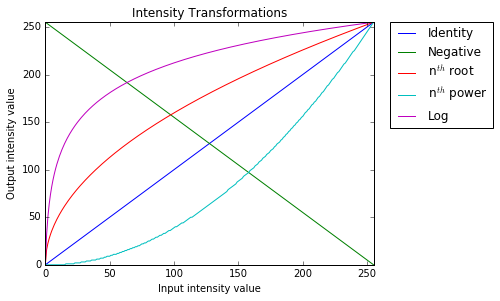

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x=np.array(range(256))
y1=x
y2=np.max(range(256))-x
y3=np.sqrt(x)*np.max(range(256))/np.max(np.sqrt(x))
y4=np.power(x,2)*np.max(range(256))/np.max(np.power(x,2))
y5=np.log(x+1)*np.max(range(256))/np.max(np.log(x+1))
Trans=['Identity','Negative','n$^{th}$ root','n$^{th}$ power','Log']

fig=plt.figure(figsize=(20, 20))
ax1=plt.subplot(4, 3, 1)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.title('Intensity Transformations')
plt.xlabel('Input intensity value')
plt.ylabel('Output intensity value')
plt.xlim([0,255])
plt.ylim([0,255])
plt.legend(Trans,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

An interesting application of the Log Transformation is to display Fourier Spectra. This is the Log-Transform:

$$
y(\textbf{n})=c \cdot  log(x(\textbf{n}) +1)
$$

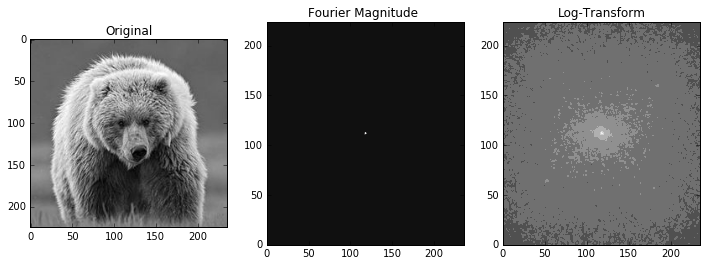

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import signal, misc, ndimage
import numpy as np

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L')
x = np.array(range(np.size(Ibw,0))); y = np.array(range(np.size(Ibw,1)))
X,Y = np.meshgrid(y,x)

Hbw = np.fft.fft2(Ibw)
Hbwa=np.abs(Hbw)
Hshift = np.fft.fftshift( Hbwa )
# apply log
Hlogbwa = 10*np.log10(Hbwa+1)
Hlogshift = np.fft.fftshift( Hlogbwa )

fig=plt.figure(figsize=(12, 4))
ax1=plt.subplot(1, 3, 1)
plt.imshow(Ibw,cmap='gray')
plt.title('Original')
ax2=fig.add_subplot(132)
ax2.contourf(X,Y,Hshift,cmap='gray')
plt.title('Fourier Magnitude ')
ax3=fig.add_subplot(133)
ax3.contourf(X,Y,Hlogshift,cmap='gray')
plt.title('Log-Transform')

Power-Law Transformation can be written as:
$$
output = c \cdot input^{\gamma}
$$

With small $\gamma$ image intensity is expanded. With high $\gamma$ image intensity is compressed. Here is an example of a Gamma-correction

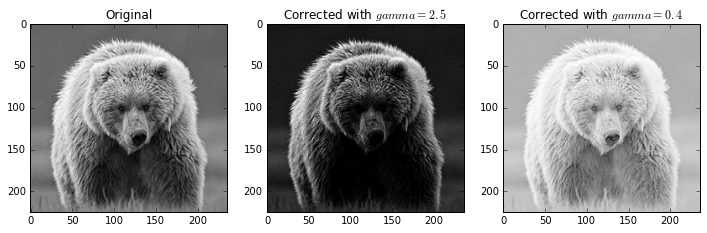

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import signal, misc, ndimage
import numpy as np

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L')

gamma1 = 2.5
gamma2 = 0.4
# apply gamma correction
Ibwg1 = np.power(Ibw,gamma1)*255/np.max(np.power(Ibw,gamma1))
Ibwg2 = np.power(Ibw,gamma2)*255/np.max(np.power(Ibw,gamma2))

fig=plt.figure(figsize=(12, 4))
ax1=plt.subplot(1, 3, 1)
plt.imshow(Ibw,cmap='gray')
plt.title('Original')
ax2=fig.add_subplot(132)
ax2.imshow(Ibwg1,cmap='gray')
plt.title('Corrected with $gamma=2.5$ ')
ax3=fig.add_subplot(133)
ax3.imshow(Ibwg2,cmap='gray')
plt.title('Corrected with $gamma=0.4$ ')

Another Transformation we could apply is Contrast Stretching, which means mapping the Intensity between the min and the max Intensity of the image.

Another widely used transformation is the Dynamic Range Expansion, in which we can in general choose to apply a different (linear) Transformation (piece-wise) to the Intensity, compressing some parts and expanding some other parts.

Another Piece-wise Transformation is Intensity-Level Slicing.

We can also apply Bit-Plane Slicing, in which every plane is a binary plane. This would tell us which bitplanes are most important in the composition of the image. Let's see an example:

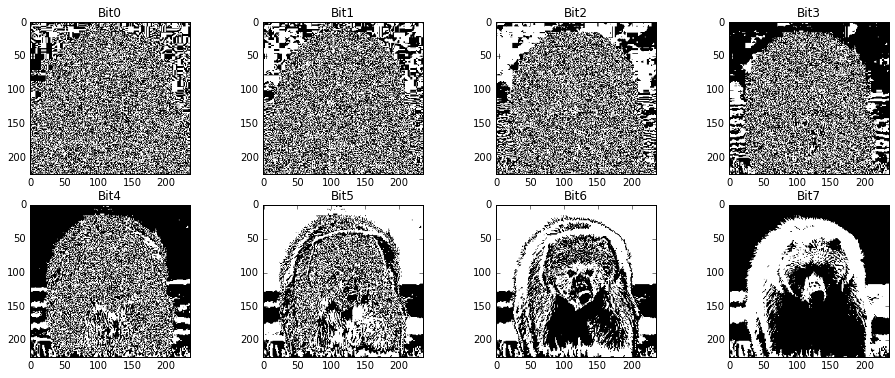

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import signal, misc, ndimage
import numpy as np

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L').astype(int)
nbits = int(np.log2(256))
# the following could be more efficient...
Ibw_bin = np.zeros(Ibw.shape)
Ibw_bin.astype(str)
Ibw_bin0 = np.zeros(Ibw.shape); Ibw_bin1 = np.zeros(Ibw.shape); Ibw_bin2 = np.zeros(Ibw.shape); 
Ibw_bin3 = np.zeros(Ibw.shape); Ibw_bin4 = np.zeros(Ibw.shape); Ibw_bin5 = np.zeros(Ibw.shape);
Ibw_bin6 = np.zeros(Ibw.shape); Ibw_bin7 = np.zeros(Ibw.shape)
for i in range(np.size(Ibw,0)):
    for j in range(np.size(Ibw,1)):
        Ibw_bin[i,j]='{0:08b}'.format(Ibw[i,j])
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-1]=='1':
            Ibw_bin0[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-2]=='1':
            Ibw_bin1[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-3]=='1':
            Ibw_bin2[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-4]=='1':
            Ibw_bin3[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-5]=='1':
            Ibw_bin4[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-6]=='1':
            Ibw_bin5[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-7]=='1':
            Ibw_bin6[i,j]=1
        if str('{0:08d}'.format(int(Ibw_bin[i,j])))[nbits-8]=='1':
            Ibw_bin7[i,j]=1

fig=plt.figure(figsize=(16, 6))
ax1=plt.subplot(2, 4, 1)
plt.imshow(Ibw_bin0,cmap='gray')
plt.title('Bit0')
ax2=fig.add_subplot(242)
ax2.imshow(Ibw_bin1,cmap='gray')
plt.title('Bit1')
ax3=fig.add_subplot(243)
ax3.imshow(Ibw_bin2,cmap='gray')
plt.title('Bit2')
ax4=fig.add_subplot(244)
ax4.imshow(Ibw_bin3,cmap='gray')
plt.title('Bit3')
ax5=fig.add_subplot(245)
plt.imshow(Ibw_bin4,cmap='gray')
plt.title('Bit4')
ax6=fig.add_subplot(246)
ax6.imshow(Ibw_bin5,cmap='gray')
plt.title('Bit5')
ax7=fig.add_subplot(247)
ax7.imshow(Ibw_bin6,cmap='gray')
plt.title('Bit6')
ax8=fig.add_subplot(248)
ax8.imshow(Ibw_bin7,cmap='gray')
plt.title('Bit7')

The Histogram of an image represents the intensity distribution of an image. We'll find out how to equalize an image. Let's define it as $h(k)=n_k$, with $n_k$ the number of pixels with value $k$. We can think of it as the PDF of intensity values. An example of application would be the Contrast Stretching, that can be applied on the image with an $x_{max}$ and an $x_{min}$ as parameter. The final objective would be the equalization of the input image.

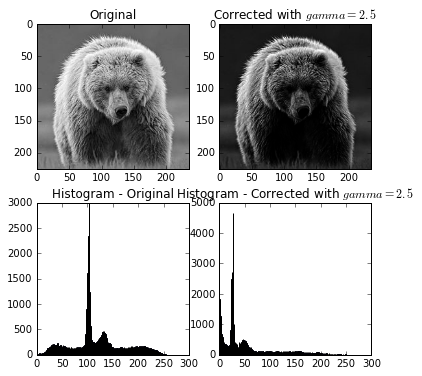

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import signal, misc, ndimage
import numpy as np
import skimage

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L')

gamma1 = 2.5
# apply gamma correction
Ibwg1 = np.power(Ibw,gamma1)*255/np.max(np.power(Ibw,gamma1))
# calculate histograms
#skimage.exposure.histogram(image, nbins=256)
H1, bins1=np.histogram(Ibw, bins=256)
H2, bins2=np.histogram(Ibwg1, bins=256)
center1 = (bins1[:-1] + bins1[1:]) / 2
center2 = (bins2[:-1] + bins2[1:]) / 2

fig=plt.figure(figsize=(6, 6))
ax1=plt.subplot(2, 2, 1)
plt.imshow(Ibw,cmap='gray')
plt.title('Original')
ax2=fig.add_subplot(222)
ax2.imshow(Ibwg1,cmap='gray')
plt.title('Corrected with $gamma=2.5$ ')
ax3=fig.add_subplot(223)
ax3.bar(center1, H1, align='center')
plt.title('Histogram - Original')
ax4=fig.add_subplot(224)
ax4.bar(center2, H2, align='center')
plt.title('Histogram - Corrected with $gamma=2.5$ ')


Histogram Equalization is the most common processing. The idea is to obtain a flat histogram. To do that, there are some steps:

$$
p_x(i)=p(x=i) =\frac{n_i}{MN}, 0\leq i \leq L-1
$$

with $p_x$ being the PDF (it is basically a normalized histogram), so that:

$$
\sum\limits^{L-1}_{i=0}p_x(i)=1
$$

The CDF is:

$$
P_x(i)=\sum\limits^{1}_{j=0}p_x(j)
$$

To perform this Point-wise Transformation, I will use this $P_x$:

$$
\tilde{y}(\textbf{n})=P_x(x(\textbf{n}))
$$

$$
y(\textbf{n})=(L-1) \cdot \tilde{y}(\textbf{n})
$$


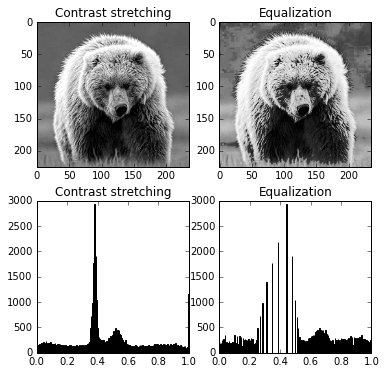

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import signal, misc, ndimage
import numpy as np
from skimage import exposure, img_as_float

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L').astype(int)


# Contrast stretching
p2, p98 = np.percentile(Ibw, (2, 98))
img_rescale = exposure.rescale_intensity(Ibw.astype(float), in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(Ibw)

bins=256

fig=plt.figure(figsize=(6, 6))
ax1=plt.subplot(2, 2, 1)
plt.imshow(img_rescale,cmap='gray')
plt.title('Contrast stretching')
ax2=fig.add_subplot(222)
ax2.imshow(img_eq,cmap='gray')
plt.title('Equalization')
ax3=fig.add_subplot(223)
ax3.hist(img_as_float(img_rescale).ravel(), bins=bins)
plt.title('Contrast stretching')
ax4=fig.add_subplot(224)
ax4.hist(img_as_float(img_eq).ravel(), bins=bins)
plt.title('Equalization')

## Spatial Filtering

### Noise Smoothing

It can be an enhancement or recovery problem. Noise smoothing can be linear or not. The objective is to reduce noise. We can use LSI systems:

$$
y(n_1,n_2)=x(n_1,n_2)+w(n_1,n_2)
$$

$$
y(n_1,n_2) \rightarrow \tilde{x}(n_1,n_2)=y(n_1,n_2)**h(n_1,n_2)
$$

$$
Y(k_1,k_2) \rightarrow \tilde{X}(k_1,k_2)=Y(k_1,k_2)\cdot H(k_1,k_2)
$$



In the Frequency Domain, noise looks like a flat (in case of white noise) spectrum that adds to the original spectrum. If we apply a low pass filter $|H(\omega)|$, I'll remove the noise for high frequencies but I'll smooth the spectrum out as a drawback. A low-pass filter (zero centered) could look like:

$$
h(n_1,n_2)=
\begin{bmatrix}
    \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
    \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
    \frac{1}{9} & \frac{1}{9} & \frac{1}{9} 
\end{bmatrix}
$$

And the Frequency response will be:

$$
H(\omega_1,\omega_2)=\frac{1}{9}+\frac{2}{9}cos(\omega_1n_1)+\frac{2}{9}cos(\omega_2n_2)+\frac{2}{9}cos(\omega_1n_1+\omega_2n_2)+\frac{2}{9}cos(\omega_1n_1-\omega_2n_2) 
$$

and of course, $H(0,0)=1$. This type of filter works with additive broadband noise.

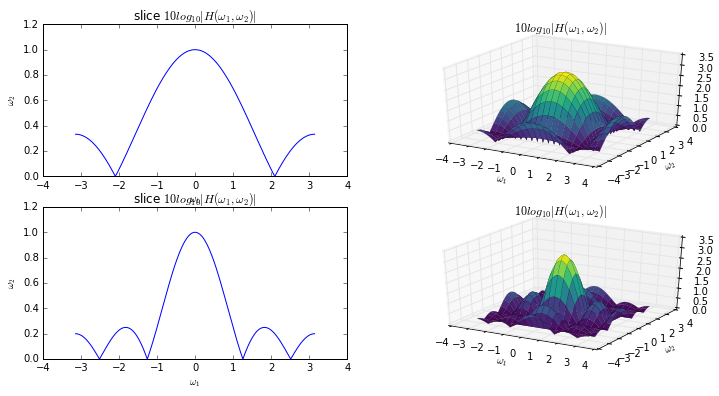

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
import numpy as np

# h(n1,n2)
h1 = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1])
h2 = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1])
h3 = np.array([1./9, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9, 1./9])
omega1 = np.linspace(-np.pi, np.pi, 201)
omega2 = np.linspace(-np.pi, np.pi, 201)
[Omega1, Omega2] = np.meshgrid(omega1, omega2)

h1a = np.array([-2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2])
h2a = np.array([-2, -2, -2, -2, -2, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
h3a = np.array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 
                0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04])
# H(w1,w2)
H = np.sum(np.array([h3[i]*np.exp(-1j*(Omega1*h1[i]+Omega2*h2[i])) for i in range(len(h1))]),0)
Ha = np.sum(np.array([h3a[i]*np.exp(-1j*(Omega1*h1a[i]+Omega2*h2a[i])) for i in range(len(h1a))]),0)

fig=plt.figure(figsize=(12, 6))
# absolute values of H
ax1=plt.subplot(2, 2, 1)
surf=ax1.plot(omega1, np.abs(H[:,int(np.size(H,1)/2.)]))
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('slice $10log_{10}|H(\omega_1,\omega_2)|$')
ax2 = fig.add_subplot(222, projection='3d')
surf1=ax2.plot_surface(Omega1,Omega2, 10*np.log10(np.abs(H)+1), vmin=0, vmax=3, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')
ax3 = fig.add_subplot(223)
surf=ax3.plot(omega1, np.abs(Ha[:,int(np.size(Ha,1)/2.)]))
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('slice $10log_{10}|H(\omega_1,\omega_2)|$')
ax4 = fig.add_subplot(224, projection='3d')
surf1=ax4.plot_surface(Omega1,Omega2, 10*np.log10(np.abs(Ha)+1), vmin=0, vmax=3, cmap='viridis', linewidth=0.1)
plt.xlabel('$\omega_1$'); plt.ylabel('$\omega_2$')
plt.title('$10log_{10}|H(\omega_1,\omega_2)|$')

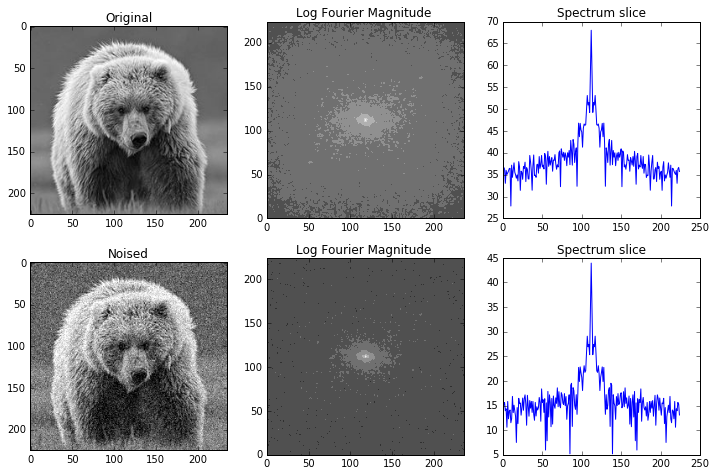

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
from scipy import signal, misc, ndimage
import numpy as np
import skimage

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L')
Ibwn=skimage.util.random_noise(Ibw/255., mode='gaussian', seed=None, clip=True)

x = np.array(range(np.size(Ibw,0))); y = np.array(range(np.size(Ibw,1)))
X,Y = np.meshgrid(y,x)

Hbw = np.fft.fft2(Ibw)
Hbwa=np.abs(Hbw)
Hshift = np.fft.fftshift( Hbwa )
Hbwn = np.fft.fft2(Ibwn)
Hbwna=np.abs(Hbwn)
Hshiftn = np.fft.fftshift( Hbwna )
# apply log
Hlogbwa = 10*np.log10(Hbwa+1)
Hlogshift = np.fft.fftshift( Hlogbwa )
Hlogbwna = 10*np.log10(Hbwna+1)
Hlogshiftn = np.fft.fftshift( Hlogbwna )

fig=plt.figure(figsize=(12, 12))
ax1=plt.subplot(3, 3, 1)
plt.imshow(Ibw,cmap='gray')
plt.title('Original')
ax2=fig.add_subplot(332)
ax2.contourf(X,Y,Hlogshift,cmap='gray')
plt.title('Log Fourier Magnitude ')
ax3=fig.add_subplot(333)
ax3.plot(x,Hlogshift[:,int(np.size(Ibw,1)/2.)])
plt.title('Spectrum slice')
ax4=plt.subplot(3, 3, 4)
plt.imshow(Ibwn,cmap='gray')
plt.title('Noised')
ax5=plt.subplot(3, 3, 5)
ax5.contourf(X,Y,Hlogshiftn,cmap='gray')
plt.title('Log Fourier Magnitude ')
ax6=fig.add_subplot(336)
ax6.plot(x,Hlogshiftn[:,int(np.size(Ibwn,1)/2.)])
plt.title('Spectrum slice')

The image becomes more blurry with larger low-pass filters, although these filters are more effective against the noise. How do we overcome this? The best way is to create a Spatially Adaptive Filter. With $x,y$ input and output respectively:

$$
y(n_1,n_2)=(1-\frac{\sigma^2_n}{\sigma^2_{x_l}}) x(n_1,n_2)+\frac{\sigma^2_n}{\sigma^2_{x_l}} \bar{x}(n_1,n_2)
$$

with $x_l$ denoting the local properties. $\bar{x}$ is the flat filter. $\sigma^2_n$ is the noise variance. $\sigma^2_{x_l}$ is the noise variance. This will remove noise in case of either high or low variance. The only extra computation is calculating the variance.

When the noise is impulsive, the LSI we have seen do not work well. Let's take the salt and pepper. A good filter for it is the Median Filter. We will also see additive impulsive + additive broadband noise. The Median Filter is defined as:

$$
y(n_1,n_2)=median \{ x(n_1-m_1,n_2-m_2), (m_1,m_2) \in \mathcal{N} \}
$$

A median filter is Non-linear, Good for reducing impulsive (bipolar: salt&pepper; unipolar: pepper or salt) noise. It will preserve spatial resolution. It hs poor performance with broadband noise. !-D median Filters have better performance than 2D median filters. Here's an example. Notice how the corners are distorted and not preserved.

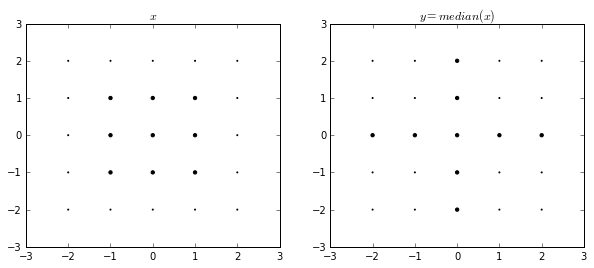

In [26]:
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.morphology import disk
import numpy as np
import skimage

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L')
Ibwn=skimage.util.random_noise(Ibw/255., mode='gaussian', seed=None, clip=True)

x = np.array(range(np.size(Ibw,0))); y = np.array(range(np.size(Ibw,1)))
X,Y = np.meshgrid(y,x)

# h(n1,n2)
h1 = np.array([-2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2, -2, -1, 0, 1, 2])
h2 = np.array([-2, -2, -2, -2, -2, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
h3 = np.array([0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 
                0., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

h_matrix3 = np.reshape(h3,(5,5))

y3 = median(h_matrix3,selem=np.ones((3,3)))/255. # 3by3 filter

fig=plt.figure(figsize=(10, 4))
ax=plt.subplot(121)
ax.scatter(h1,h2, c='k',s=[(x+0.1)*10 for x in h3] )
plt.xlim([-3,3]); plt.ylim([-3,3]);
plt.title('$x$')
ax=plt.subplot(122)
ax.scatter(h1,h2, c='k',s=[(x+0.1)*10 for x in y3] )
plt.xlim([-3,3]); plt.ylim([-3,3]);
plt.title('$y=median(x)$')

Therefore we prefer to use separable filters, horizontal and vertical. If we apply to an image, we have:

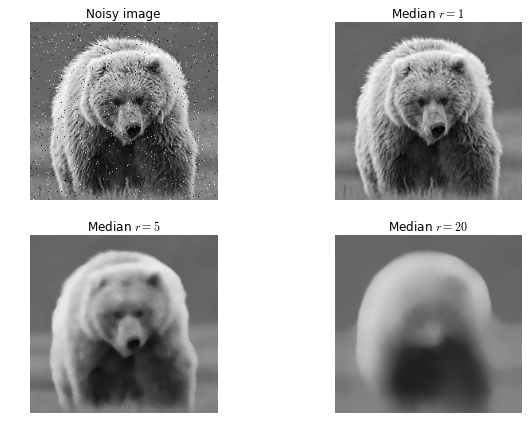

In [40]:
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage import img_as_ubyte
from scipy import signal, misc, ndimage
import numpy as np
import skimage

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L').astype(int)
Ibwn=skimage.util.random_noise(Ibw/255., mode='gaussian', seed=None, clip=True)

noise = np.random.random(Ibw.shape)

x = np.array(range(np.size(Ibw,0))); y = np.array(range(np.size(Ibw,1)))
X,Y = np.meshgrid(y,x)

noisy_image = img_as_ubyte(Ibw)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax1.set_title('Noisy image')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax2.set_title('Median $r=1$')
ax2.axis('off')
ax2.set_adjustable('box-forced')


ax3.imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax3.set_title('Median $r=5$')
ax3.axis('off')
ax3.set_adjustable('box-forced')


ax4.imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax4.set_title('Median $r=20$')
ax4.axis('off')
ax4.set_adjustable('box-forced')

Also, applying the Median Filter several times one after another might help. 

Keeping in mind that $\mathcal{N}$ is the number of pixels in the neighbourhood, other possible filters are (for pepper noise) the Max Filter:

$$
y(n_1,n_2)=\max\limits_{(m_1,m_2)\in \mathcal{N}} \{ x(m_1,m_2) \}
$$

The Min filter (for salt noise):

$$
y(n_1,n_2)=\min\limits_{(m_1,m_2)\in \mathcal{N}} \{ x(m_1,m_2) \}
$$

The Mid point filter (for randomly distributed noise like Gaussian or Uniform):

$$
y(n_1,n_2)=\frac{1}{2} \left( \max\limits_{(m_1,m_2)\in \mathcal{N}} \{ x(m_1,m_2) \} + \min\limits_{(m_1,m_2)\in \mathcal{N}} \{ x(m_1,m_2) \} \right)
$$

Alpha-trimmed mean filters, where $x_r(m_1,m_2)$ are the remaining values after we delete the $\frac{\alpha}{2}$ lowest anf highest values:

$$
y(n_1,n_2)=\frac{1}{|\mathcal{N}|-\alpha} \sum\limits_{(m_1,m_2)\in \mathcal{N}} x_r(m_1,m_2)
$$

There's also a family of Filters called Mean Filters, like the Arithmetic mean filter:

$$
y(n_1,n_2)=\frac{1}{|\mathcal{N}|} \sum\limits_{(m_1,m_2)\in \mathcal{N}} x(m_1,m_2)
$$

Geometric mean filter:

$$
y(n_1,n_2)=\left[ \prod\limits_{(m_1,m_2) \in \mathcal{N}}  x(m_1,m_2) \right]^\frac{1}{|\mathcal{N}|} 
$$

Harmonic mean filter (does well with salt and gaussian type of noise):

$$
y(n_1,n_2)=|\mathcal{N}| \left[ \sum\limits_{(m_1,m_2) \in \mathcal{N}}  \frac{1}{x(m_1,m_2)} \right]^{-1} 
$$

Contra-harmonic mean filter (with $Q>0$ eliminates pepper, with $Q<0$ eliminates salt):

$$
y(n_1,n_2)= \left[ \sum\limits_{(m_1,m_2) \in \mathcal{N}}  x(m_1,m_2)^{Q+1} \right]   \left[ \sum\limits_{(m_1,m_2) \in \mathcal{N}}  x(m_1,m_2)^{Q} \right]^{-1} 
$$





### Sharpening

Very often we want to focus on the edges, making edges sharper. High pass filters (like the LaPlacian, do this job). Also sharpen image can be obtained by subtracting the blurred signal to the original signal; then the unsharp image is merged with the original image, and the final image is obtained. The steps are:

$$
y(n_1,n_2)=x_L (n_1,n_2)+(1+a) x_H(n_1,n_2)
$$

where x_L and x_H are the high and low frequencies of the original image. $a>1$ highboost filtering. $a<1$ de-emphasize the mask.

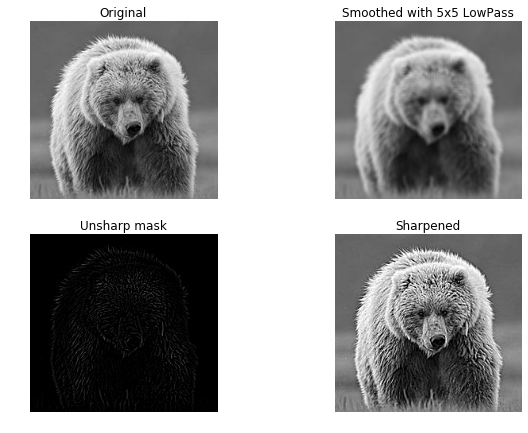

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage, signal

Irgb = misc.imread(os.path.join('media','bear.png') );
Ibw = misc.imread(os.path.join('media','bear.png'),'L').astype(int)

# normalization. Didn't bother look for something existing...
Ix_d = np.array([x/255. for x in Ibw]) # possibly, but no need

LPF = np.array([[1./25, 1./25, 1./25, 1./25, 1./25],
                 [1./25, 1./25, 1./25, 1./25, 1./25],
                 [1./25, 1./25, 1./25, 1./25, 1./25],
                 [1./25, 1./25, 1./25, 1./25, 1./25],
                 [1./25, 1./25, 1./25, 1./25, 1./25]])

a = 1. # sharpening factor

Ix_d_smoothed = ndimage.convolve(Ix_d, LPF, mode='nearest')
Ix_d_unsharp = Ix_d-Ix_d_smoothed
Ix_d_sharpened = Ix_d_smoothed+(1+a)*Ix_d_unsharp

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()
ax1.imshow(Ix_d, vmin=0, vmax=1, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')
ax1.set_adjustable('box-forced')
ax2.imshow(Ix_d_smoothed, vmin=0, vmax=1, cmap=plt.cm.gray)
ax2.set_title('Smoothed with 5x5 LowPass')
ax2.axis('off')
ax2.set_adjustable('box-forced')
ax3.imshow(Ix_d_unsharp, vmin=0, vmax=1, cmap=plt.cm.gray)
ax3.set_title('Unsharp mask')
ax3.axis('off')
ax3.set_adjustable('box-forced')
ax4.imshow(Ix_d_sharpened, vmin=0, vmax=1, cmap=plt.cm.gray)
ax4.set_title('Sharpened')
ax4.axis('off')
ax4.set_adjustable('box-forced')


We could find details by looking at the first, second, ... order derivative of the signal. Laplacian filter, for example, looks at the second order derivative.

### Homomorphic Filtering

Concept developed in the '60s, it consists of three parts: Non-linear mapping, Linear Filtering and Inverse Transformation. The objective is to decrease Dynamic range and increase Local Contrast. An image with a large dynamic range, recorded on a medium with a small dynamic range, which lowers the contrast. Therefore, we want to reduce the Dynamic range and increase the contrast before recording it with the small dynamic range medium.

$$
x(n_1,n_2)=i(n_1,n_2) \cdot r(n_1,n_2)
$$

with $i$ Illumination (primary contributor to Dynamic Range), and $r$ Reflectance (primary contributor to local contrast). Homomorphic Processing helps us in this:

$$
\log x(n_1,n_2)=\log\left[i(n_1,n_2)\right] + \log\left[ r(n_1,n_2) \right]
$$

I will LPF the Illumination with $\gamma_1 < 1$. HPF Reflectance with $\gamma_2 > 1$. So:

$$
y_2 = \gamma_1 \log i + \gamma_2 \log r \rightarrow x_0 = i^{\gamma_1} r^{\gamma_2}
$$


## Pseudo Coloring

We'll talk about Pseudo-coloring and Colorization of a B&W image. 

With Pseudo-Coloring we want to give attention to some objects only, match the color sensitivity of a human viewer, exploit contrast sensitivity, give color to multispectral images, Colorization. In Colorization, some initial conditions are needed. These conditions are called Scribbles. The Scribbles are then used in the algorithm to produce a Colorized image. The main idea is that: 

Changes in color correspond in general to changes in intensity

We assign a pixel chrominance based on chrominance of nearby pixels with similar intensity Y

Minimize (in the YUV)


## Video Enhancement

We can treat each frame independently (using any filter for any frame), but we can take the time and motion into account to help us. It is a complex task. We could consider a 3D volume of pixels to maintain consecutive frames consistance. Noise Filtering can be 3D filtering (no ME, motion-dependent, explicit ME). Video Arctifact removal is also a popular task.

With Noise Filtering, we can define a Degradation Model:

$$
g(i,j,k)=f(i,j,k)+n(i,j,k)
$$

in which we can eventually take into account Motion Estimation. If ME and Intensity Filtering are done simultaneously, we have a more convenient solution. Also, we can consider Non-MC Spatio-temporal Filtering like FIR (ex. Average Filter and 3D Wiener filter) or IIR (ex. 3D Kalman Filter, Order Statistics based filters). However, the temporal-dependent filter can be taken into account by considering a factor being function of the spatio-temporal edge. Same holds for MC Spatio-temporal Filtering (FIR, IIR), in which the region changes based on the Motion parameters.








Issues are Blotches (due to dirt,..), Intensity Flicker (or "boiling effect"), Vinegar syndrome (it can show up in different forms). Blotches occur only on one frame, then we compute the average $g_k=\frac{1}{2}(f_{k-1}+f_{k+1})$ in $k$ time. Get the difference $d_1=|g_k-f_k|$, we find $d_2=|f_{k-1}-f_k|$, and $d_3=|f_k-f_{k+1}|$ to calculate $\tau=\mu+\eta \sigma$ which produces a binary mask for and $d_i$. 

For the removal of Noise all of the filters can be utilized. We use:

$$
f_k(m,n)=(1-\alpha(mask))f_k(m,n)+\alpha (mask) \mu_k (m,n)
$$

For no-motion, $\alpha=1$, for motion, $\alpha=0$